# 01 - Análisis Exploratorio de Datos

**Proyecto:** Forecast Promtur - Tráfico Orgánico  
**Objetivo:** Explorar y entender la estructura de los datos de GA4

---

## Contenido:
1. Carga de datos
2. Configuración de nombres de columnas
3. Inspección inicial
4. Calidad de datos
5. Análisis por canal
6. Visualizaciones exploratorias
7. Conclusiones preliminares

## 1. Configuración inicial y librerías

In [24]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Configuración de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Semilla para reproducibilidad
np.random.seed(42)

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


## 2. Carga de datos

In [25]:
# Definir rutas del proyecto
DATA_RAW = Path('../data/raw')
DATA_PROCESSED = Path('../data/processed')
RESULTS_FIGURES = Path('../results/figures/exploratory')

# Crear carpetas si no existen
RESULTS_FIGURES.mkdir(parents=True, exist_ok=True)

# Cargar dataset
csv_file = DATA_RAW / 'ga4_promtur_organic_2025.csv'

# Verificar que existe el archivo
if csv_file.exists():
    df_raw = pd.read_csv(csv_file)
    print(f"✅ Dataset cargado exitosamente")
    print(f"📊 Dimensiones: {df_raw.shape[0]} filas x {df_raw.shape[1]} columnas")
else:
    print(f"❌ Error: No se encontró el archivo {csv_file}")
    print(f"📁 Asegúrate de colocar el CSV en: {DATA_RAW}")

✅ Dataset cargado exitosamente
📊 Dimensiones: 82 filas x 7 columnas


## 2.1 Configuración de nombres de columnas

**IMPORTANTE:** Aquí se definen los nombres EXACTOS de las columnas del CSV original.  
Si cambias el CSV en el futuro, solo modifica esta celda.

In [26]:
# ===================================================================
# CONFIGURACIÓN: Nombres de columnas del CSV original
# ===================================================================
# Estos nombres deben coincidir EXACTAMENTE con los del CSV

year_col = 'Year'
month_col = 'Month number'  # Nota: 'number' con n minúscula
canal_col = 'Session Default Channel Group Custom (Recovery)'
sessions_col = 'Sessions - GA4'
bounces_col = 'Bounces'
duration_col = 'Total session duration - GA4'
views_col = 'Views - GA4'

# Verificar que todas las columnas existen en el dataset
columnas_requeridas = [
    year_col, month_col, canal_col, sessions_col, 
    bounces_col, duration_col, views_col
]

columnas_faltantes = [col for col in columnas_requeridas if col not in df_raw.columns]

if columnas_faltantes:
    print("❌ ERROR: Las siguientes columnas no se encontraron en el CSV:")
    for col in columnas_faltantes:
        print(f"   - {col}")
    print("\n📋 Columnas disponibles en el CSV:")
    for col in df_raw.columns:
        print(f"   - {col}")
else:
    print("✅ Variables de columnas configuradas correctamente")
    print(f"   - Año: '{year_col}'")
    print(f"   - Mes: '{month_col}'")
    print(f"   - Canal: '{canal_col}'")
    print(f"   - Sesiones: '{sessions_col}'")
    print(f"   - Rebotes: '{bounces_col}'")
    print(f"   - Duración: '{duration_col}'")
    print(f"   - Vistas: '{views_col}'")

✅ Variables de columnas configuradas correctamente
   - Año: 'Year'
   - Mes: 'Month number'
   - Canal: 'Session Default Channel Group Custom (Recovery)'
   - Sesiones: 'Sessions - GA4'
   - Rebotes: 'Bounces'
   - Duración: 'Total session duration - GA4'
   - Vistas: 'Views - GA4'


## 3. Inspección inicial

In [27]:
# Primeras filas
print("📋 Primeras 10 filas del dataset:\n")
df_raw.head(10)

📋 Primeras 10 filas del dataset:



,Year,Month number,Session Default Channel Group Custom (Recovery),Sessions - GA4,Bounces,Total session duration - GA4,Views - GA4
0,2025,1,AI Traffic,135,7,20650,199
1,2025,1,Organic Search,100968,7292,22689260,191522
2,2025,1,Referral,6109,1049,1532485,13551
3,2025,1,Organic Social,858,84,99785,1408
4,2025,1,Organic Video,47,2,14287,136
5,2025,1,Direct,49275,1337,7385567,96176
6,2025,2,Direct,12724,371,3037032,22413
7,2025,2,Email,2,1,984,14
8,2025,2,Organic Video,42,1,10528,50
9,2025,2,Organic Social,706,17,161445,1708


In [28]:
# Información del dataset
print("ℹ️ Información del dataset:\n")
df_raw.info()

ℹ️ Información del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Year                                             82 non-null     int64 
 1   Month number                                     82 non-null     int64 
 2   Session Default Channel Group Custom (Recovery)  82 non-null     object
 3   Sessions - GA4                                   82 non-null     int64 
 4   Bounces                                          82 non-null     int64 
 5   Total session duration - GA4                     82 non-null     int64 
 6   Views - GA4                                      82 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 4.6+ KB


In [29]:
# Nombres de columnas originales
print("📝 Nombres de columnas originales:\n")
for i, col in enumerate(df_raw.columns, 1):
    print(f"{i}. {col}")

📝 Nombres de columnas originales:

1. Year
2. Month number
3. Session Default Channel Group Custom (Recovery)
4. Sessions - GA4
5. Bounces
6. Total session duration - GA4
7. Views - GA4


In [30]:
# Estadísticas descriptivas
print("📊 Estadísticas descriptivas:\n")
df_raw.describe()

📊 Estadísticas descriptivas:



,Year,Month number,Sessions - GA4,Bounces,Total session duration - GA4,Views - GA4
count,82.00,82.00,82.00,82.00,82.00,82.00
mean,2025.00,6.27,20903.99,6252.66,3450074.12,31521.43
std,0.00,3.21,35988.91,15278.43,6039645.31,53332.68
min,2025.00,1.00,1.00,0.00,0.00,1.00
25%,2025.00,3.25,47.25,11.25,11990.50,94.00
50%,2025.00,6.00,916.00,149.50,140623.00,1590.00
75%,2025.00,9.00,33976.00,1891.25,4145865.00,39173.25
max,2025.00,11.00,136665.00,87753.00,22689260.00,191522.00


## 4. Calidad de datos

In [31]:
# Verificar valores faltantes
print("🔍 Análisis de valores faltantes:\n")
missing = df_raw.isnull().sum()
missing_pct = (missing / len(df_raw)) * 100

missing_df = pd.DataFrame({
    'Columna': missing.index,
    'Valores Faltantes': missing.values,
    'Porcentaje (%)': missing_pct.values
})

if missing_df['Valores Faltantes'].sum() > 0:
    display(missing_df[missing_df['Valores Faltantes'] > 0])
else:
    print("✅ No hay valores faltantes en el dataset")

🔍 Análisis de valores faltantes:

✅ No hay valores faltantes en el dataset


In [32]:
# Verificar duplicados
duplicados = df_raw.duplicated().sum()
print(f"🔍 Registros duplicados: {duplicados}")

if duplicados > 0:
    print("\n⚠️ Mostrando filas duplicadas:")
    display(df_raw[df_raw.duplicated(keep=False)].sort_values(by=df_raw.columns.tolist()))
else:
    print("✅ No hay registros duplicados")

🔍 Registros duplicados: 0
✅ No hay registros duplicados


In [33]:
# Verificar valores únicos en columna de canal
print(f"🎯 Canales únicos encontrados: {df_raw[canal_col].nunique()}\n")
print("Distribución de registros por canal:")
print(df_raw[canal_col].value_counts().sort_index())

🎯 Canales únicos encontrados: 9

Distribución de registros por canal:
Session Default Channel Group Custom (Recovery)
AI Traffic          11
Direct              11
Email               10
Organic Search      11
Organic Shopping     4
Organic Social      11
Organic Video       11
QR Code              2
Referral            11
Name: count, dtype: int64


In [34]:
# Verificar rango de meses
print("📅 Rango temporal del dataset:\n")
print(f"Año(s): {sorted(df_raw[year_col].unique())}")
print(f"Meses: {sorted(df_raw[month_col].unique())}")
print(f"\nTotal de meses únicos: {df_raw[[year_col, month_col]].drop_duplicates().shape[0]}")

# Verificar que cada mes tenga datos para todos los canales
registros_por_mes = df_raw.groupby([year_col, month_col])[canal_col].count()
print(f"\nRegistros por mes:")
print(registros_por_mes)

📅 Rango temporal del dataset:

Año(s): [np.int64(2025)]
Meses: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11)]

Total de meses únicos: 11

Registros por mes:
Year  Month number
2025  1               6
      2               7
      3               8
      4               7
      5               7
      6               7
      7               7
      8               8
      9               7
      10              9
      11              9
Name: Session Default Channel Group Custom (Recovery), dtype: int64


## 5. Análisis por canal

In [35]:
# Resumen de métricas por canal
print("📊 Resumen de métricas por canal:\n")

resumen = df_raw.groupby(canal_col).agg({
    sessions_col: ['sum', 'mean', 'min', 'max'],
    bounces_col: ['sum', 'mean'],
    duration_col: ['sum', 'mean'],
    views_col: ['sum', 'mean']
}).round(2)

display(resumen)

📊 Resumen de métricas por canal:



Sessions - GA4           \
                                                           sum     mean   
Session Default Channel Group Custom (Recovery)                           
AI Traffic                                                2728   248.00   
Direct                                                  816678 74243.45   
Email                                                      796    79.60   
Organic Search                                          828455 75314.09   
Organic Shopping                                            36     9.00   
Organic Social                                           23690  2153.64   
Organic Video                                              354    32.18   
QR Code                                                     51    25.50   
Referral                                                 41339  3758.09   

                                                               Bounces  \
                                                   min     max     sum   
Session Default Channel Group Custom (Recovery)                          
AI Traffic                                         135     399     566   
Direct                                           12724  136665  360380   
Email                                                2     243     230   
Organic Search                                   53914  100968  132156   
Organic Shopping                                     1      28       3   
Organic Social                                     706    8543   11665   
Organic Video                                       10      48      64   
QR Code                                              9      42      22   
Referral                                          2653    6109    7632   

                                                          \
                                                    mean   
Session Default Channel Group Custom (Recovery)            
AI Traffic                                         51.45   
Direct                                          32761.82   
Email                                              23.00   
Organic Search                                  12014.18   
Organic Shopping                                    0.75   
Organic Social                                   1060.45   
Organic Video                                       5.82   
QR Code                                            11.00   
Referral                                          693.82   

                                                Total session duration - GA4  \
                                                                         sum   
Session Default Channel Group Custom (Recovery)                                
AI Traffic                                                            632313   
Direct                                                              81546594   
Email                                                                  56944   
Organic Search                                                     185397415   
Organic Shopping                                                       84645   
Organic Social                                                       1930136   
Organic Video                                                          90007   
QR Code                                                                32341   
Referral                                                            13135683   

                                                            Views - GA4  \
                                                       mean         sum   
Session Default Channel Group Custom (Recovery)                           
AI Traffic                                         57483.00        4142   
Direct                                           7413326.73      962537   
Email                                               5694.40         892   
Organic Search                                  16854310.45     1486618   
Organic Shopping                                   

In [36]:
# Calcular métricas derivadas por canal para análisis
print("📈 Métricas derivadas promedio por canal:\n")

df_metricas = df_raw.copy()
df_metricas['bounce_rate'] = (df_metricas[bounces_col] / df_metricas[sessions_col]) * 100
df_metricas['views_per_session'] = df_metricas[views_col] / df_metricas[sessions_col]
df_metricas['avg_session_duration'] = df_metricas[duration_col] / df_metricas[sessions_col]

metricas_resumen = df_metricas.groupby(canal_col).agg({
    'bounce_rate': 'mean',
    'views_per_session': 'mean',
    'avg_session_duration': 'mean'
}).round(2)

metricas_resumen.columns = ['Bounce Rate (%)', 'Vistas/Sesión', 'Duración Promedio (seg)']
display(metricas_resumen)

📈 Métricas derivadas promedio por canal:



,Bounce Rate (%),Vistas/Sesión,Duración Promedio (seg)
Session Default Channel Group Custom (Recovery),,,
AI Traffic,19.27,1.52,235.48
Direct,36.19,1.26,115.20
Email,46.45,1.74,148.63
Organic Search,16.46,1.79,223.71
Organic Shopping,54.17,0.79,3526.22
Organic Social,32.85,1.50,111.85
Organic Video,19.79,1.81,237.18
QR Code,48.02,2.10,457.34
Referral,20.07,2.39,336.01


## 6. Visualizaciones exploratorias

In [37]:
# Crear columna de fecha para visualizaciones
df_raw['fecha'] = pd.to_datetime(
    df_raw[year_col].astype(str) + '-' + df_raw[month_col].astype(str) + '-01'
)
print("✅ Columna de fecha creada")

✅ Columna de fecha creada


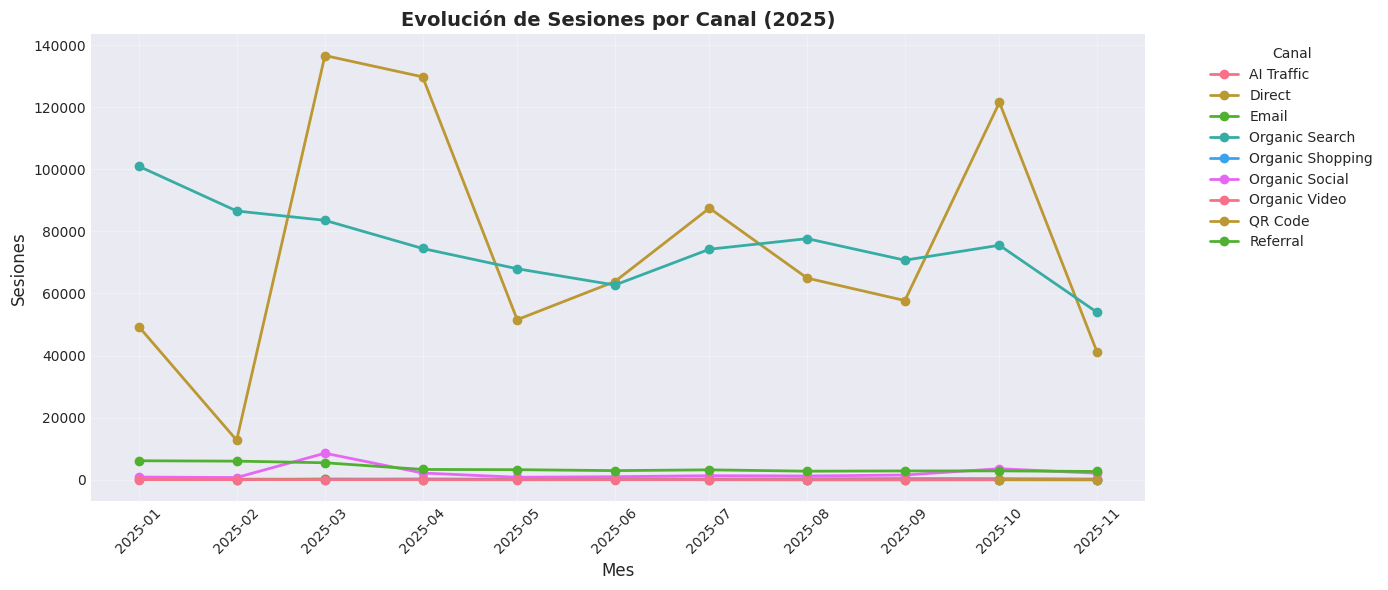

💾 Gráfico guardado en: ../results/figures/exploratory/sessions_by_channel_timeseries.png


In [38]:
# Gráfico 1: Sesiones por canal a lo largo del tiempo
fig, ax = plt.subplots(figsize=(14, 6))

for canal in sorted(df_raw[canal_col].unique()):
    data_canal = df_raw[df_raw[canal_col] == canal].sort_values('fecha')
    ax.plot(data_canal['fecha'], data_canal[sessions_col], 
            marker='o', label=canal, linewidth=2, markersize=6)

ax.set_xlabel('Mes', fontsize=12)
ax.set_ylabel('Sesiones', fontsize=12)
ax.set_title('Evolución de Sesiones por Canal (2025)', fontsize=14, fontweight='bold')
ax.legend(title='Canal', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

# Guardar gráfico
plt.savefig(RESULTS_FIGURES / 'sessions_by_channel_timeseries.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"💾 Gráfico guardado en: {RESULTS_FIGURES / 'sessions_by_channel_timeseries.png'}")

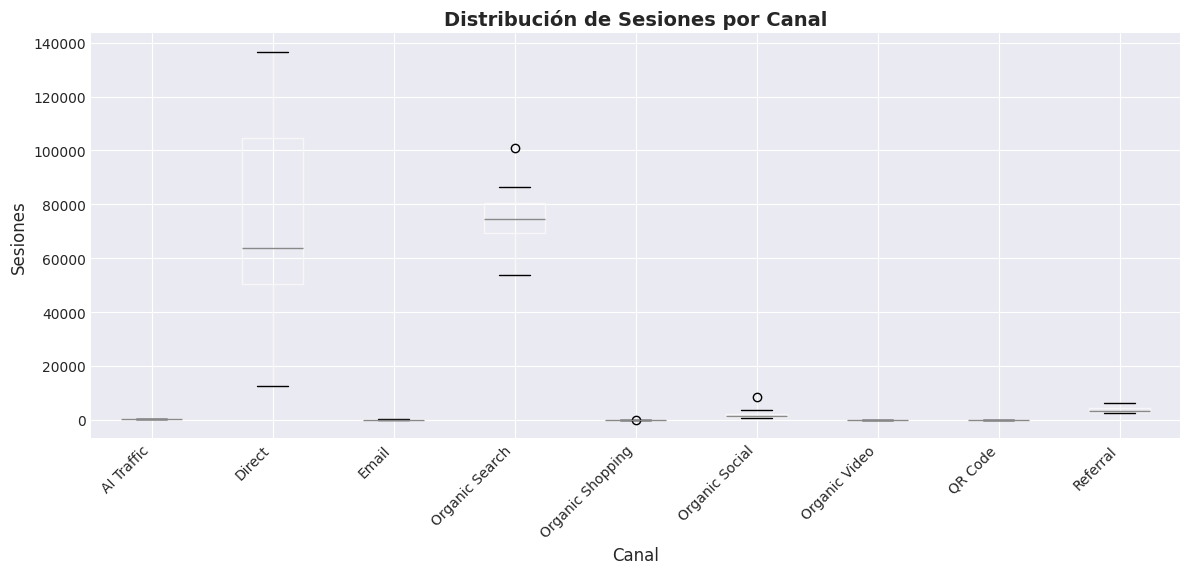

💾 Gráfico guardado en: ../results/figures/exploratory/sessions_distribution_boxplot.png


In [39]:
# Gráfico 2: Distribución de sesiones por canal (boxplot)
fig, ax = plt.subplots(figsize=(12, 6))

df_raw.boxplot(column=sessions_col, by=canal_col, ax=ax)
ax.set_xlabel('Canal', fontsize=12)
ax.set_ylabel('Sesiones', fontsize=12)
ax.set_title('Distribución de Sesiones por Canal', fontsize=14, fontweight='bold')
plt.suptitle('')  # Remover título automático de pandas
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Guardar gráfico
plt.savefig(RESULTS_FIGURES / 'sessions_distribution_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"💾 Gráfico guardado en: {RESULTS_FIGURES / 'sessions_distribution_boxplot.png'}")

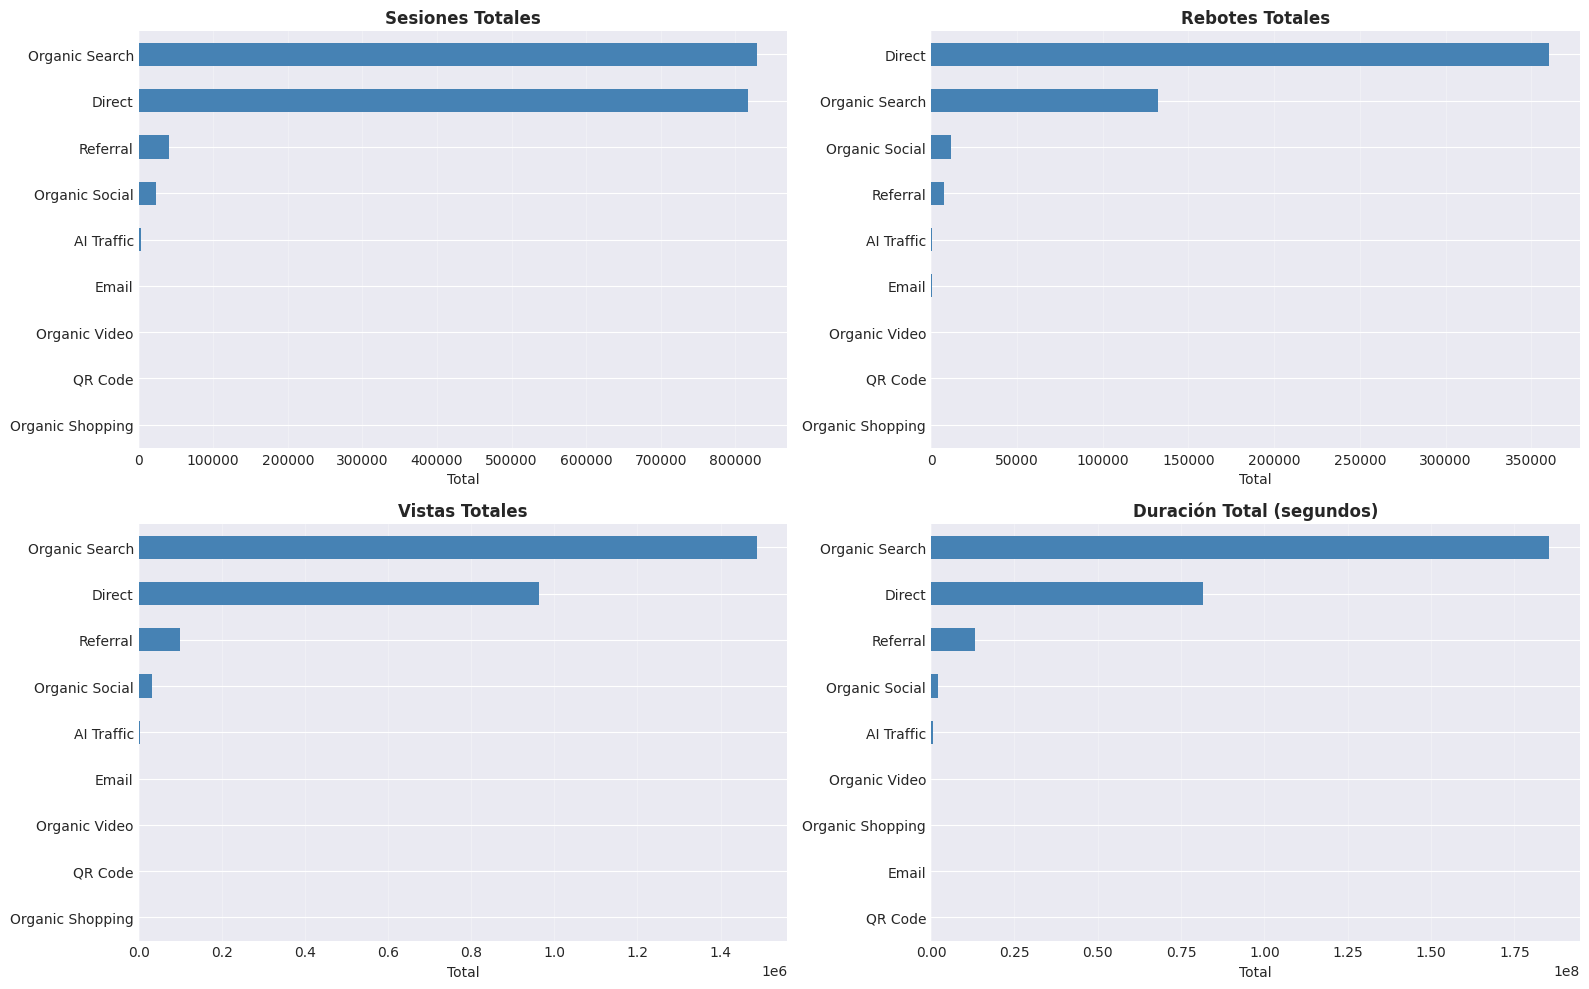

💾 Gráfico guardado en: ../results/figures/exploratory/metrics_comparison_by_channel.png


In [40]:
# Gráfico 3: Comparación de métricas totales por canal
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

metricas = [
    (sessions_col, 'Sesiones Totales'),
    (bounces_col, 'Rebotes Totales'),
    (views_col, 'Vistas Totales'),
    (duration_col, 'Duración Total (segundos)')
]

for idx, (metrica, titulo) in enumerate(metricas):
    ax = axes[idx // 2, idx % 2]
    data_canal = df_raw.groupby(canal_col)[metrica].sum().sort_values(ascending=True)
    data_canal.plot(kind='barh', ax=ax, color='steelblue')
    ax.set_title(titulo, fontsize=12, fontweight='bold')
    ax.set_xlabel('Total', fontsize=10)
    ax.set_ylabel('')
    ax.grid(True, alpha=0.3, axis='x')

plt.tight_layout()

# Guardar gráfico
plt.savefig(RESULTS_FIGURES / 'metrics_comparison_by_channel.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"💾 Gráfico guardado en: {RESULTS_FIGURES / 'metrics_comparison_by_channel.png'}")

## 7. Conclusiones preliminares

In [41]:
# Resumen ejecutivo
print("="*70)
print("📊 RESUMEN EJECUTIVO DEL ANÁLISIS EXPLORATORIO")
print("="*70)

print(f"\n1. DIMENSIONES DEL DATASET:")
print(f"   - Total de registros: {df_raw.shape[0]}")
print(f"   - Total de columnas: {df_raw.shape[1]}")
print(f"   - Canales únicos: {df_raw[canal_col].nunique()}")
print(f"   - Meses cubiertos: {df_raw[[year_col, month_col]].drop_duplicates().shape[0]}")

print(f"\n2. CALIDAD DE DATOS:")
print(f"   - Valores faltantes: {df_raw.isnull().sum().sum()}")
print(f"   - Registros duplicados: {df_raw.duplicated().sum()}")

print(f"\n3. CANALES IDENTIFICADOS:")
for canal in sorted(df_raw[canal_col].unique()):
    registros = len(df_raw[df_raw[canal_col] == canal])
    sesiones_totales = df_raw[df_raw[canal_col] == canal][sessions_col].sum()
    print(f"   - {canal}: {registros} registros | {sesiones_totales:,.0f} sesiones totales")

print(f"\n4. MÉTRICAS PRINCIPALES (TOTALES):")
print(f"   - Sesiones: {df_raw[sessions_col].sum():,.0f}")
print(f"   - Rebotes: {df_raw[bounces_col].sum():,.0f}")
print(f"   - Vistas: {df_raw[views_col].sum():,.0f}")
print(f"   - Duración total: {df_raw[duration_col].sum():,.2f} segundos")

print(f"\n5. OBSERVACIONES:")
canales_bajo_volumen = df_raw.groupby(canal_col)[sessions_col].mean()
canales_bajo_volumen = canales_bajo_volumen[canales_bajo_volumen < 1000].index.tolist()
if canales_bajo_volumen:
    print(f"   ⚠️ Canales con bajo volumen (<1000 sesiones promedio):")
    for canal in canales_bajo_volumen:
        print(f"      - {canal}")
    print(f"   💡 Considerar si estos canales deben incluirse en el forecasting")
else:
    print(f"   ✅ Todos los canales tienen volumen significativo")

print(f"\n6. PRÓXIMOS PASOS:")
print(f"   ✓ Limpieza y transformación de datos (Notebook 02)")
print(f"   ✓ Convertir nombres de columnas a snake_case")
print(f"   ✓ Calcular métricas derivadas")
print(f"   ✓ Decidir qué canales incluir en el forecasting")

print("\n" + "="*70)

📊 RESUMEN EJECUTIVO DEL ANÁLISIS EXPLORATORIO

1. DIMENSIONES DEL DATASET:
   - Total de registros: 82
   - Total de columnas: 8
   - Canales únicos: 9
   - Meses cubiertos: 11

2. CALIDAD DE DATOS:
   - Valores faltantes: 0
   - Registros duplicados: 0

3. CANALES IDENTIFICADOS:
   - AI Traffic: 11 registros | 2,728 sesiones totales
   - Direct: 11 registros | 816,678 sesiones totales
   - Email: 10 registros | 796 sesiones totales
   - Organic Search: 11 registros | 828,455 sesiones totales
   - Organic Shopping: 4 registros | 36 sesiones totales
   - Organic Social: 11 registros | 23,690 sesiones totales
   - Organic Video: 11 registros | 354 sesiones totales
   - QR Code: 2 registros | 51 sesiones totales
   - Referral: 11 registros | 41,339 sesiones totales

4. MÉTRICAS PRINCIPALES (TOTALES):
   - Sesiones: 1,714,127
   - Rebotes: 512,718
   - Vistas: 2,584,757
   - Duración total: 282,906,078.00 segundos

5. OBSERVACIONES:
   ⚠️ Canales con bajo volumen (<1000 sesiones promedio):

---

## 📌 Notas importantes:

- Este notebook asume que el CSV está en `data/raw/ga4_promtur_organic_2025.csv`
- Todos los nombres de columnas están centralizados en la celda de configuración (sección 2.1)
- Las visualizaciones se guardan automáticamente en `results/figures/exploratory/`
- Si tienes datos de 2024, repite este análisis para ese año

## ✅ Checklist antes de continuar al Notebook 02:

- [ ] CSV cargado correctamente
- [ ] Sin valores faltantes críticos
- [ ] Canales identificados y validados
- [ ] Visualizaciones generadas y revisadas
- [ ] Decisión tomada sobre qué canales incluir en el análisis